# Edge Detection on the Berkley Dataset

In this notebook, I will use my knowledge on the `datablock` API, to quickly load and visualize the **BSED** dataset

In [1]:
from fastai.vision import *

## Investigating the data structure

In [2]:
from pathlib import Path

path = Path("/home/anass/HED-BSDS/")
path.ls()

[PosixPath('/home/anass/HED-BSDS/train_pair.lst'),
 PosixPath('/home/anass/HED-BSDS/test'),
 PosixPath('/home/anass/HED-BSDS/test.lst'),
 PosixPath('/home/anass/HED-BSDS/train')]

As we can see from the outptu of the dataset. It has two folders `train` and `test` and a file listing the paris `train_pair.lst`

In [3]:
import numpy as np
pair_list = np.loadtxt(path/'train_pair.lst',dtype=str)
codes = ['edge', 'continous']

In [34]:
from pathlib import Path
path_labels = path/'train'/'aug_gt'

Origin =Path(path_img/'270.0_1_0'/'14037.jpg')
#label  = Path(path/'images'/'aug_gt')/Origin.relative_to(path/'train'/'aug_data').with_suffix('.png')

get_y_func = lambda x: path/'train'/'aug_gt'/x.relative_to(path/'train'/'aug_data').with_suffix('.png')    #name of the gt 
print(Origin)
print(get_y_func(Origin))

/home/anass/HED-BSDS/train/aug_data/270.0_1_0/14037.jpg
/home/anass/HED-BSDS/train/aug_gt/270.0_1_0/14037.png


In [35]:
path_img = path/'train'/'aug_data'
path_labels = path/'train'/'aug_gt'

data = (SegmentationItemList.from_folder(path_img)          #source of the files
        .split_by_rand_pct()                                # Split by random validation set 20%
        .label_from_func(get_y_func,classes=codes)         # get labes by replacing the name of the file
        .transform(get_transforms(), tfm_y=True, size=128)  #transform the data
        .databunch()
       )

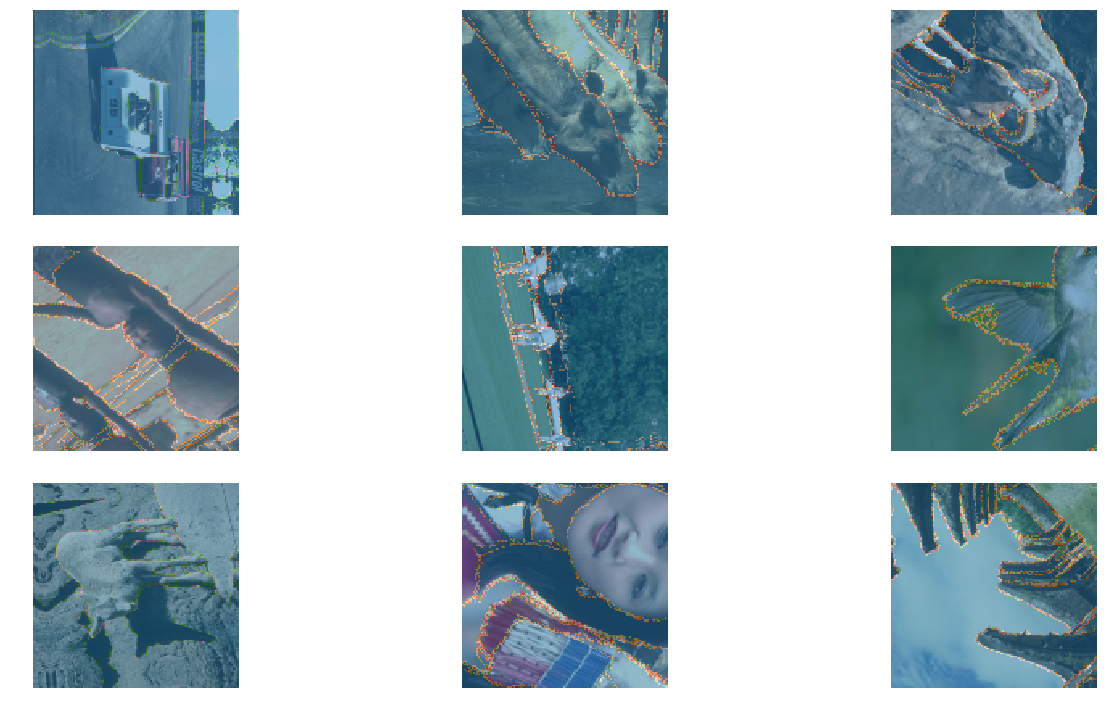

In [36]:
data.show_batch(3,figsize=(20,10))

## Creating a learner

In [9]:
from functools import partial

f_score = partial(fbeta, thresh=0.2)
learner = unet_learner(data,models.resnet34,metrics=[f_score])

In [10]:
learner.lr_find()
learner.recoder.plot()

RuntimeError: CUDA error: device-side assert triggered